In [46]:

import glob
from tqdm import tqdm
import NB_classifier as NB
from datasets import load_dataset
from importlib import reload
import features
import evaluation

# Language Identification with Python

For the task of automatic langueage identification I used a multinomial Naive Bayes classifier.
As features a bag-of-words approach with character n-grams $(1<=n<=4)$ was used.

As a dataset I took the universal dependencies corpus from HuggingFace with a predetermined train and test split.

I decided to test the classifier on these 20 languages:

In [21]:
languages = ['ca', 'es', 'pt', 'fr', 'it', 'ro', 'da', 'no', 'sv', 'de', 'nl', 'en', 'cs', 'pl', 'hr', 'lt', 'et', 'fi', 'hu', 'tr']
languages_ud_codes = ['ca_ancora', 'es_gsd', 'pt_bosque', 'fr_gsd', 'it_isdt', 'ro_rrt', 'da_ddt', 'no_bokmaal', 'sv_talbanken', 'de_gsd', 'nl_alpino', 'en_ewt', 'cs_cac', 'pl_pdb', 'hr_set', 'lt_alksnis', 'et_edt', 'fi_tdt',  'hu_szeged', 'tr_boun']

### Download the dataset

In [22]:
datasets = []
for sub_data in languages_ud_codes:
    print(sub_data)
    datasets.append(load_dataset('universal_dependencies', sub_data))

ca_ancora


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/ca_ancora/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 390.18it/s]


es_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/es_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 492.06it/s]


pt_bosque


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/pt_bosque/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 617.17it/s]


fr_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/fr_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 475.37it/s]


it_isdt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/it_isdt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 536.49it/s]


ro_rrt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/ro_rrt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 583.62it/s]


da_ddt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/da_ddt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 684.15it/s]


no_bokmaal


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/no_bokmaal/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 463.02it/s]


sv_talbanken


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/sv_talbanken/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 662.82it/s]


de_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/de_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 512.29it/s]


nl_alpino


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/nl_alpino/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 573.41it/s]


en_ewt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/en_ewt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 582.76it/s]


cs_cac


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/cs_cac/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 366.97it/s]


pl_pdb


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/pl_pdb/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 416.85it/s]


hr_set


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/hr_set/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 605.68it/s]


lt_alksnis


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/lt_alksnis/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 316.23it/s]


et_edt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/et_edt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 385.15it/s]


fi_tdt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/fi_tdt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 483.18it/s]


hu_szeged


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/hu_szeged/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 572.08it/s]


tr_boun


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/tr_boun/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 684.30it/s]


In [23]:
print(len(datasets))

20


### Build training and test sets

In [24]:
train_X_texts, train_y = [],[]
for lang, ds in zip(languages, datasets):
    for i, datapoint in enumerate(ds['train']):
        train_X_texts.append(datapoint['text'])
        train_y.append(lang)
        

In [25]:
test_X_texts, test_y = [],[]
for lang, ds in zip(languages, datasets):
    for datapoint in ds['test']:
        test_X_texts.append(datapoint['text'])
        test_y.append(lang)

In [26]:
print(f'number of training data samples: {len(train_y)}')
print(f'number of test data samples: {len(test_y)}')

number of training data samples: 230272
number of test data samples: 22608


### Finding all ngrams in the training data

In [27]:
ngram_lookup = features.collect_all_n_grams(train_X_texts)

In [28]:
print(f'there are {len(ngram_lookup)} distinct n-grams (1<=n<=4) in the training data')

there are 491274 distinct n-grams (1<=n<=4) in the training data


### Sampling the ngrams

In [29]:
for i, (key,val) in enumerate(ngram_lookup.items()):
    print (key,':', val)
    if i >10:
        break

('a', 'n', 'é', 'a') : 0
('c', 'o', 'd', 'e') : 1
('n', ' ', 'Í', 's') : 2
('A', ' ', 'd', 'v') : 3
('O', ' ', 'i', 'n') : 4
('a', 'ž', 't', 'e') : 5
('O', ' ', 'G', 'e') : 6
('M', 'U', 'R', 'E') : 7
('C', 'U', 'L') : 8
('j', 'í', 'c') : 9
('ø', 'j', 't') : 10
('A', 'n', 'i', 'b') : 11


### Generate vectors of ngram counts for the training data

In [30]:
train_X =[]
for text in train_X_texts:
    vector = features.build_feature_vector(text, ngram_lookup)
    train_X.append(vector)

In [31]:
print('size of a feature vector:', train_X[0].size, '(only theoretical not in memory)')

size of a feature vector: 491274 (only theoretical not in memory)


### Training the classifier on the training data

In [32]:
mnb = NB.MNB_classfier()
mnb.train(train_X, train_y)

training classifier for 20 classes with 491274 features.


100%|██████████| 230272/230272 [00:26<00:00, 8586.24it/s] 

training finished!


### Employing BOW on test data counting only the ngrams discovered in training

In [33]:
test_X =[]
for text in test_X_texts:
    vector = features.build_feature_vector(text, ngram_lookup)
    test_X.append(vector)

### Prediction of label for all samples in test data

In [34]:
pred_y = mnb.predict(test_X)

100%|██████████| 22608/22608 [03:13<00:00, 116.85it/s]


#### calculated accuracy

In [35]:
evaluation.accuracy(pred_y, test_y)

0.9575813871196037

#### Comparing against langdetect python library (out of the box no retraining)

In [36]:
from langdetect import detect, LangDetectException
pred_y_langdetect = []
for t in tqdm(test_X_texts):
    try:
        pred_y_langdetect.append(detect(t))
    except LangDetectException:
        pred_y_langdetect.append('unknown')

100%|██████████| 22608/22608 [01:53<00:00, 199.57it/s]


In [37]:
evaluation.accuracy(pred_y_langdetect, test_y)

0.9438251946213729

#### Comparing against langid.py out of the box

In [38]:
import langid
pred_y_langid = [langid.classify(t)[0] for t in tqdm(test_X_texts)]

100%|██████████| 22608/22608 [00:23<00:00, 977.59it/s] 


In [39]:
evaluation.accuracy(pred_y_langid, test_y)

0.9285208775654635

#### Plotting a confusion matrix over all the labels

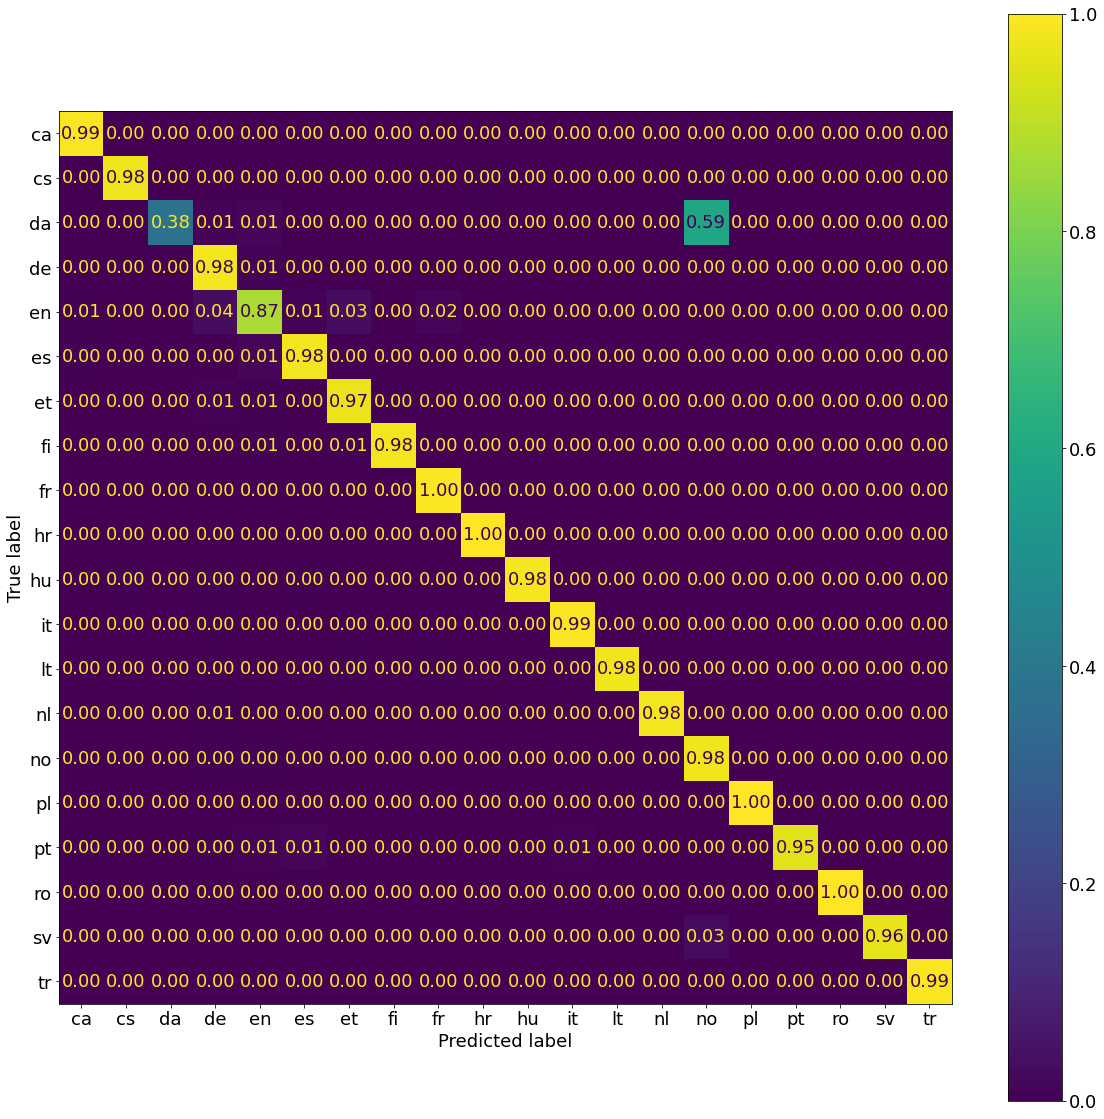

In [45]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (20,20))
disp = ConfusionMatrixDisplay.from_predictions(test_y, pred_y, ax=ax, normalize='true', values_format='.2f')

In [41]:
mnb.to_file('./UD_model.pkl')

In [42]:
mnb.from_file('./UD_model.pkl')

### Using another out-of-domain dataset (wikipedia)

In [55]:
wiki_X_texts, wiki_y = [], []
for l in languages:
    for filename in glob.glob(f'../language_detection/src/main/resources/naacl2010-langid/Wikipedia/{l}_*'):
        with open(filename, 'r') as f:
            lang_strin = f.read()
            wiki_X_texts.append(lang_strin)
            wiki_y.append(l)

In [56]:
len(wiki_X_texts)

3725

In [59]:
wiki_X = []
for text in wiki_X_texts:
    vector = features.build_feature_vector(text, ngram_lookup)
    wiki_X.append(vector)

In [60]:
wiki_pred_y = mnb.predict(wiki_X)

100%|██████████| 3725/3725 [02:42<00:00, 22.85it/s]


In [61]:
evaluation.accuracy(wiki_pred_y, wiki_y)

0.9267114093959732

In [62]:
wiki_pred_y_langdetect = []
for t in tqdm(wiki_X_texts):
    try:
        wiki_pred_y_langdetect.append(detect(t))
    except LangDetectException:
        wiki_pred_y_langdetect.append('unknown')

100%|██████████| 3725/3725 [00:23<00:00, 156.09it/s]


In [63]:
evaluation.accuracy(wiki_pred_y_langdetect, wiki_y)

0.9336912751677853

In [64]:
wiki_pred_y_langid = [langid.classify(t)[0] for t in tqdm(wiki_X_texts)]

100%|██████████| 3725/3725 [00:07<00:00, 505.36it/s]


In [65]:
evaluation.accuracy(wiki_pred_y_langid, wiki_y)

0.9430872483221476

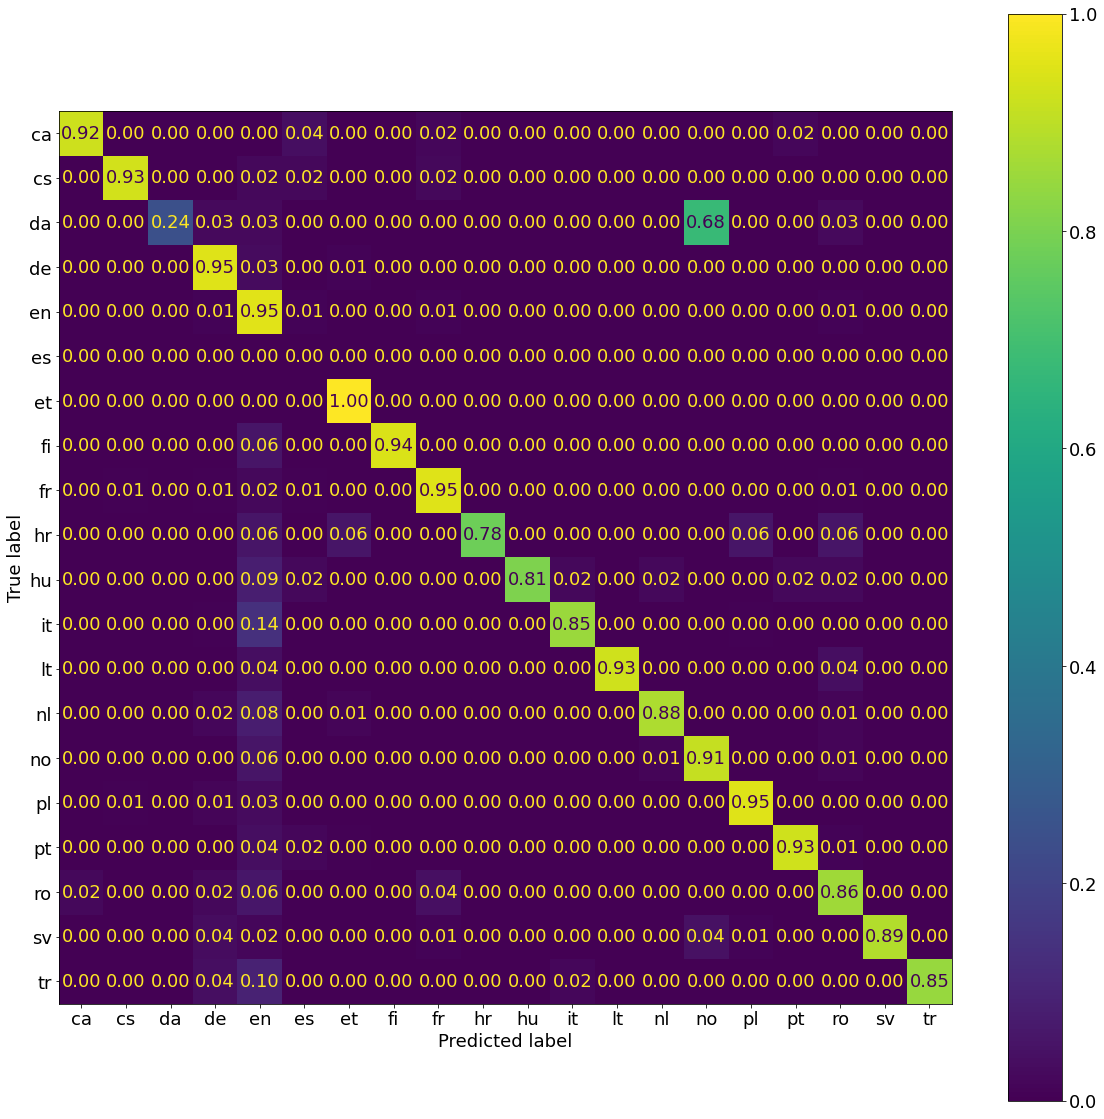

In [66]:
fig, ax = plt.subplots(figsize = (20,20))
disp = ConfusionMatrixDisplay.from_predictions(wiki_y, wiki_pred_y, ax=ax, normalize='true', values_format='.2f')